In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

In [2]:
ds = pd.read_csv('/home/jbrun0r/Documentos/scripts/datasets/insurance.csv')

Age: Idade do beneficiário

Sex: Gênero do beneficiário

BMI: IMC do beneficiario, Kilograma / m² (idealmente 18.5 a 24.9)

Children: Número de filhos / dependentes do seguro

Smoker: Se fuma

Region: Região que o usário mora (Regiões americanas)

Charge: Seguro que cada um paga

In [3]:
ds.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


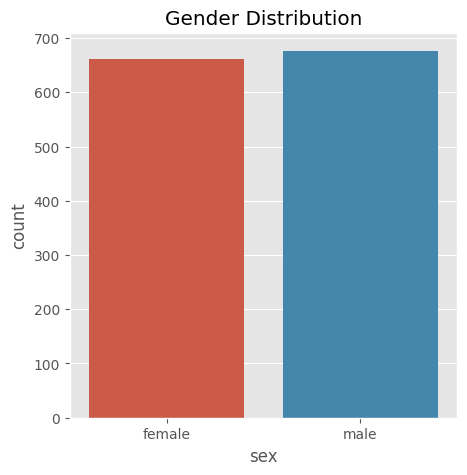

In [6]:
# Distribuição de Genero
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='sex', data=ds)
plt.title('Gender Distribution')
plt.show()

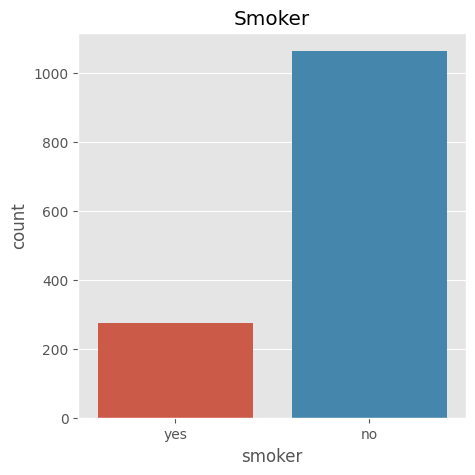

In [8]:
# Contagem dos Fumantes
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=ds)
plt.title('Smoker')
plt.show()

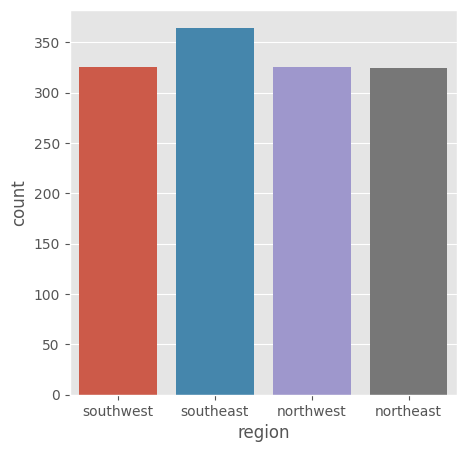

In [9]:
# Contagem de pessoas por região
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=ds)
plt.show()


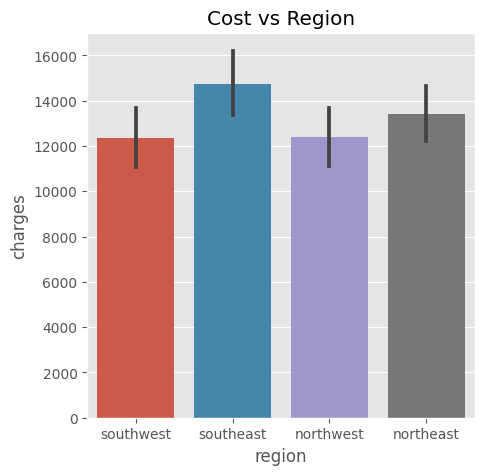

In [11]:
# Custo x Region
plt.figure(figsize=(5,5))
sns.barplot(x='region', y= 'charges', data=ds)
plt.title('Cost vs Region')
plt.show()

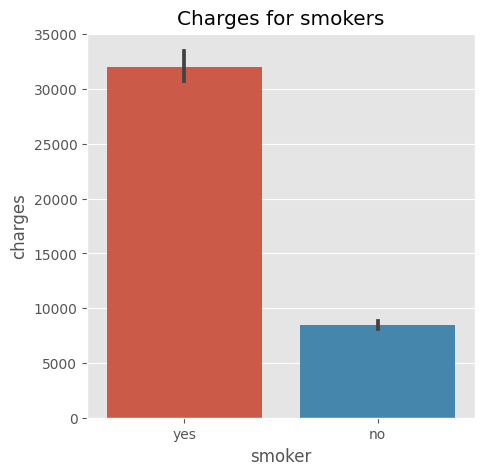

In [12]:
plt.figure(figsize=(5,5))
sns.barplot(x='smoker', y='charges', data=ds)
plt.title('Charges for smokers')
plt.show()

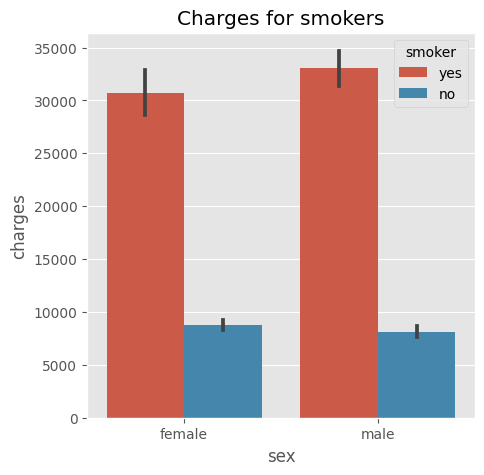

In [13]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='charges', hue='smoker', data=ds)
plt.title('Charges for smokers')
plt.show()

<AxesSubplot:xlabel='region', ylabel='charges'>

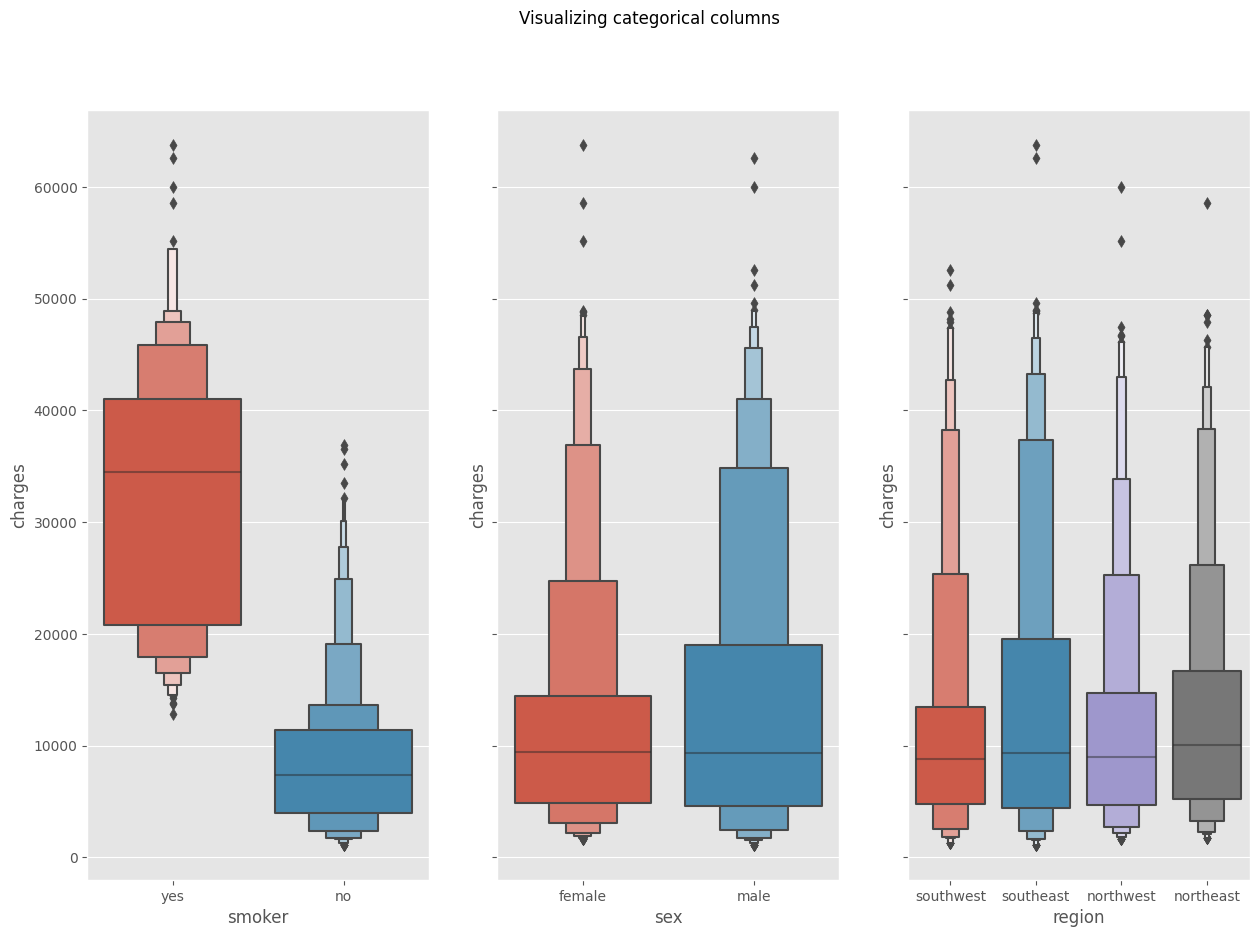

In [16]:
fig, axes = plt.subplots(1,3, figsize=(15,10), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.boxenplot(x='smoker', y='charges', data=ds, ax=axes[0])
sns.boxenplot(x='sex', y='charges', data=ds, ax=axes[1])
sns.boxenplot(x='region', y='charges', data=ds, ax=axes[2])


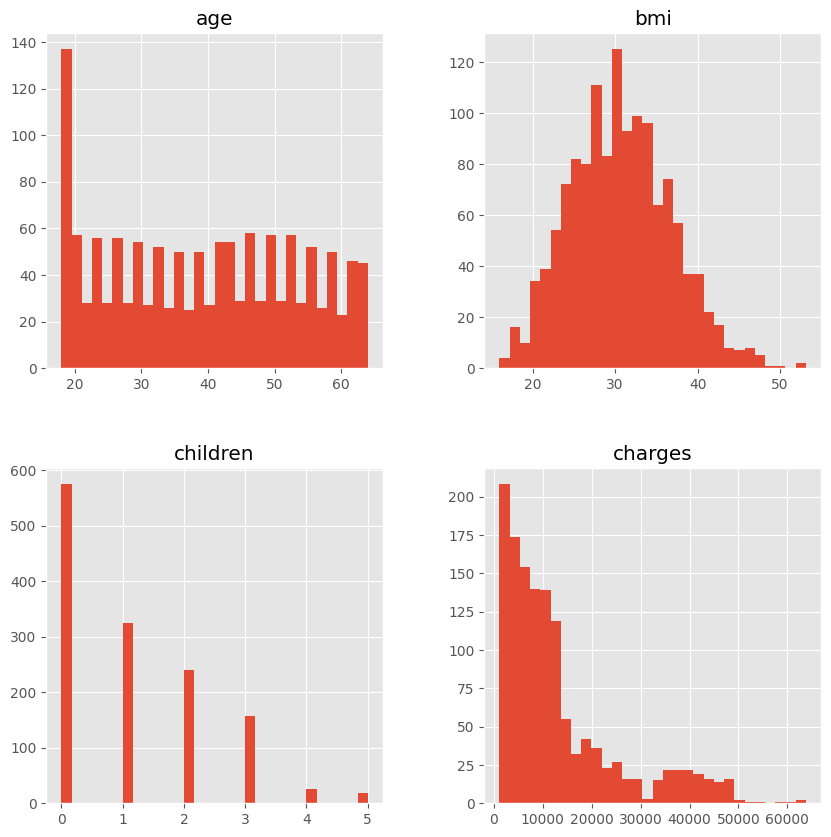

In [18]:
ds[['age', 'bmi', 'children','charges']].hist(bins=30, figsize=(10,10))
plt.show()

In [19]:
# Convertendo categoricas em numericas
ds.sex = ds.sex.apply({'female':0,'male':1,}.get)
ds.smoker = ds.smoker.apply({'no':0,'yes':1,}.get)
ds.region = ds.region.apply({'southwest':1,'southeast':2,'northwest': 3, 'northeast': 4}.get)

In [20]:
ds.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


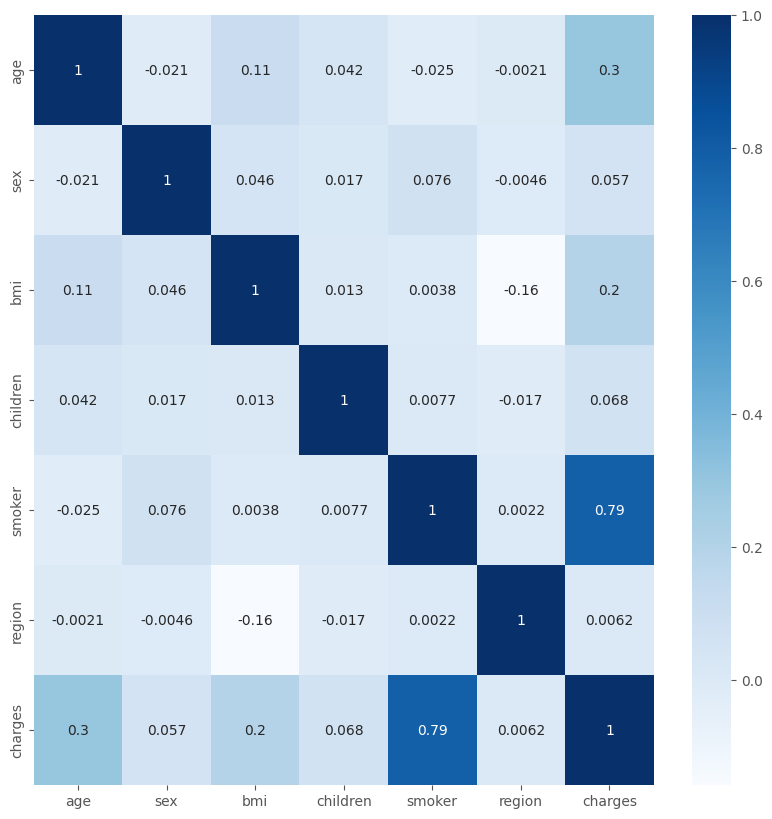

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(ds.corr(), annot = True, cmap='Blues')
plt.show()


In [71]:
X = ds.drop(['charges', 'sex'], axis=1)
y = ds.charges

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [73]:
lreg = LinearRegression()

In [74]:
lreg.fit(X_train, y_train)
pred = lreg.predict(X_test)

In [75]:
print('R2 Score: ',(r2_score(y_test, pred)))

R2 Score:  0.7605856404784287


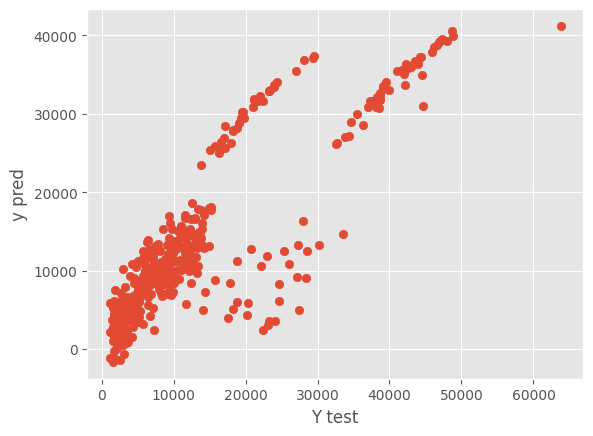

In [76]:
plt.scatter(y_test, pred)
plt.xlabel('Y test')
plt.ylabel('y pred')
plt.show()

In [80]:
data = {'age':50, 'bmi':25, 'children':2, 'smoker':1, 'region':2 }
index = [0]
custo = pd.DataFrame(data,index)
custo

,age,bmi,children,smoker,region
0,50,25,2,1,2


In [81]:
custo = lreg.predict(custo)
custo

array([33208.69038883])